In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv(r"C:\Users\Asus\OneDrive - Amrita Vishwa Vidyapeetham\Desktop\Major-Project-Dataset-_Wine-Classification_.csv")

data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0  
3      9.8      6.0  
4      9.4      5.0

In [25]:
data.columns
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1598.000000  1599.000000   
mean      0.087467            15.874922             46.433041     0.996747   
std       0.047065            10.460157             32.876249     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1598.000000  1599.000000  1599.000000  1598.000000  
mean      3.498586     0.658149    10.422983     5.636421  
std       0.080346     0.169507     1.065668     0.807665  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.520000     0.550000     9.500000     5.000000  
50%       3.520000     0.620000    10.200000     6.000000  
75%       3.520000     0.730000    11.100000     6.000000  
max       3.900000     2.000000    14.900000     8.000000

<Axes: >

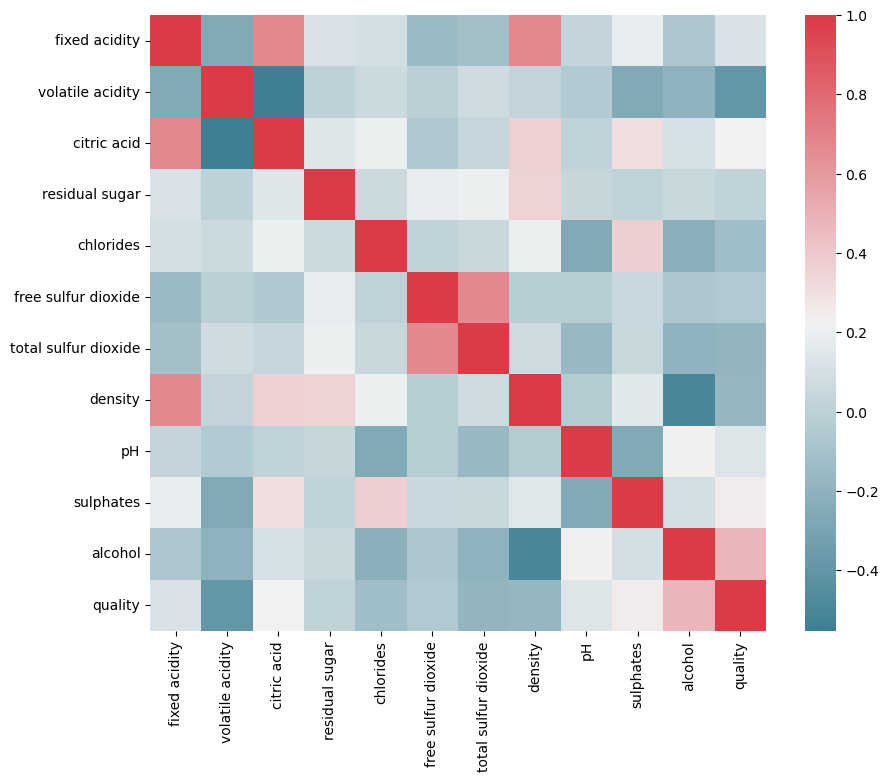

In [26]:

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
     

## Pre-processing 

In [27]:
from sklearn import preprocessing 

In [28]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [29]:
data['quality'].value_counts()

quality
good    855
bad     743
Name: count, dtype: int64

In [30]:
le = preprocessing.LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

In [31]:
x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

In [33]:
import pandas as pd

# Check for missing values in your DataFrame
missing_values = data.isnull().sum()
print(missing_values)


import pandas as pd

# Check for missing values in your DataFrame
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [39]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer on the training data and transform it
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

In [40]:

# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [42]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7506255212677231
Testing accuracy : 0.72
              precision    recall  f1-score   support

           0       0.75      0.68      0.71       204
           1       0.70      0.76      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[139  65]
 [ 47 149]]


In [43]:

from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


Training accuracy : 0.8023352793994996
Testing accuracy : 0.73


In [44]:

# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [45]:

grid_svc.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [46]:
grid_svc.best_params_

{'C': 0.9, 'gamma': 0.8, 'kernel': 'rbf'}

In [47]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       204
           1       0.72      0.74      0.73       196

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# first hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu', input_dim=11))

# second hidden layer
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))

# output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.4447 - loss: 3.5941
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.4475 - loss: 1.7523
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.4703 - loss: 0.9722
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.6711 - loss: 0.6316
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.7182 - loss: 0.5651
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.7465 - loss: 0.5656
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.7256 - loss: 0.5779
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7471 - loss: 0.5666
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7171 - loss: 0.5656
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.7096 - loss: 0.5959
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7739 - loss: 0.5471
Epoch 12/100
120/12